In [4]:
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
import numpy as np
import statistics as st
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
#Kodları çalıştırırken gelen uyarıları kapatmak için bu kodları kullanabiliriz

In [6]:
df = pd.read_excel("TSL_Puan.xlsx")
df1 = pd.read_excel("tsl_dataset_kopya.xlsx")

In [7]:
df

,Poz.,Takım,Sezon,Son sezonu,Puan,MBP,O,G,B,M,A,Y,GF,1.,2.,3.,4.,Lig
0,1,Fenerbahçe,66,2023-24,4341,"1,981",2191,1258,567,366,3932,1936,1996,19.0,24.0,8.0,5.0,Süper Lig
1,2,Galatasaray,66,2023-24,4294,"1,960",2191,1250,544,397,3883,1927,1956,23.0,11.0,16.0,3.0,Süper Lig
2,3,Beşiktaş,66,2023-24,4148,"1,895",2189,1185,593,411,3602,1903,1699,16.0,14.0,14.0,10.0,Süper Lig
3,4,Trabzonspor,50,2023-24,2972,"1,768",1681,839,455,387,2631,1667,964,7.0,9.0,8.0,9.0,Süper Lig
4,5,Bursaspor,50,2018-19,2189,"1,332",1644,572,473,599,1965,1998,-33,1.0,NaN,1.0,2.0,2. Lig
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,Petrolofisi,1,1994-95,29,"0,853",34,8,5,21,38,73,-35,NaN,NaN,NaN,NaN,Kapandı (2010)
71,72,Bucaspor,1,2010-11,26,"0,765",34,6,8,20,37,65,-28,NaN,NaN,NaN,NaN,Kapandı (2020)
72,73,Siirtspor,1,2000-01,24,"0,706",34,6,6,22,47,81,-34,NaN,NaN,NaN,NaN,Kapandı (2014)
73,74,MKE Kırıkkalespor,1,1978-79,23,"0,767",30,5,8,17,21,64,-43,NaN,NaN,NaN,NaN,Amatör Lig


In [8]:
df1

,Date,Season,Week,home,visitor,FT,hgoal,vgoal,division,tier,...,HT,hgoal_half,vgoal_half,half_totgoal,half_goaldiff,result_half,fans,neutral,home_red_card,visitor_red_card
0,1959-02-21,1958,1,Genclerbirligi,Adalet,1-1,1,1,T1,1,...,0-1,0,1,1,-1,A,1,0,0,0
1,1959-02-21,1958,1,Izmirspor,Beykoz 1908,2-1,2,1,T1,1,...,2-0,2,0,2,2,H,1,0,0,0
2,1959-02-21,1958,1,Ankara Demirspor,Galatasaray,0-2,0,2,T1,1,...,0-1,0,1,1,-1,A,1,0,0,0
3,1959-02-21,1958,1,Fenerbahce,MKE Ankaragucu,3-1,3,1,T1,1,...,1-1,1,1,2,0,D,1,0,0,0
4,1959-02-21,1958,1,Altay,Besiktas,1-2,1,2,T1,1,...,0-1,0,1,1,-1,A,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18074,2021-01-10,2020,18,Caykur Rizespor,Denizlispor,1-1,1,1,T1,1,...,0-1,0,1,1,-1,A,0,0,0,0
18075,2021-01-10,2020,18,Hatayspor,Besiktas,NaN,2,2,T1,1,...,2-2,2,2,4,0,D,0,0,0,0
18076,2021-01-11,2020,18,BB Erzurumspor,Fenerbahce,0-3,0,3,T1,1,...,0-1,0,1,1,-1,A,0,0,0,0
18077,2021-01-11,2020,18,Alanyaspor,Kasimpasa,NaN,1,2,T1,1,...,1-2,1,2,3,-1,A,0,0,0,1


In [9]:
df.shape
# Satır Sütun sayısı

(75, 18)

In [10]:
df1.shape

(18079, 23)

In [11]:
df.dtypes

Poz.            int64
Takım          object
Sezon           int64
Son sezonu     object
Puan            int64
MBP            object
O               int64
G               int64
B               int64
M               int64
A               int64
Y               int64
GF              int64
1.            float64
2.            float64
3.            float64
4.            float64
Lig            object
dtype: object

In [12]:
df1.dtypes

Date                datetime64[ns]
Season                       int64
Week                         int64
home                        object
visitor                     object
FT                          object
hgoal                        int64
vgoal                        int64
division                    object
tier                         int64
totgoal                      int64
goaldiff                     int64
result                      object
HT                          object
hgoal_half                   int64
vgoal_half                   int64
half_totgoal                 int64
half_goaldiff                int64
result_half                 object
fans                         int64
neutral                      int64
home_red_card                int64
visitor_red_card             int64
dtype: object

In [13]:
#bu fonksiyon ile veri setinde her bir sütunun kaç tane eksik değer barındırdığını öğrenmek için kullanırız
missing_values=df1.isna().sum()
missing_values

Date                 0
Season               0
Week                 0
home                 0
visitor              0
FT                  12
hgoal                0
vgoal                0
division             0
tier                 0
totgoal              0
goaldiff             0
result               0
HT                   0
hgoal_half           0
vgoal_half           0
half_totgoal         0
half_goaldiff        0
result_half          0
fans                 0
neutral              0
home_red_card        0
visitor_red_card     0
dtype: int64

In [14]:
df1.isnull().FT

0        False
1        False
2        False
3        False
4        False
         ...  
18074    False
18075     True
18076    False
18077     True
18078    False
Name: FT, Length: 18079, dtype: bool

In [15]:
df.isnull()
#boş değerleri görme

,Poz.,Takım,Sezon,Son sezonu,Puan,MBP,O,G,B,M,A,Y,GF,1.,2.,3.,4.,Lig
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False
71,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False
72,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False
73,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False


In [16]:
df.info()
#Bu fonksiyon her bir sütunun adını, içinde kaç tane dolu satır olduğunu ve
#sütunun tipini (kategorik, sürekli, tam sayı vb.) bize söyler.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Poz.        75 non-null     int64  
 1   Takım       75 non-null     object 
 2   Sezon       75 non-null     int64  
 3   Son sezonu  75 non-null     object 
 4   Puan        75 non-null     int64  
 5   MBP         75 non-null     object 
 6   O           75 non-null     int64  
 7   G           75 non-null     int64  
 8   B           75 non-null     int64  
 9   M           75 non-null     int64  
 10  A           75 non-null     int64  
 11  Y           75 non-null     int64  
 12  GF          75 non-null     int64  
 13  1.          6 non-null      float64
 14  2.          8 non-null      float64
 15  3.          17 non-null     float64
 16  4.          24 non-null     float64
 17  Lig         75 non-null     object 
dtypes: float64(4), int64(10), object(4)
memory usage: 10.7+ KB


In [17]:
 #veriler için tanımlayıcı istatistiklere göz atalım
df.describe().round(2)

,Poz.,Sezon,Puan,O,G,B,M,A,Y,GF,1.,2.,3.,4.
count,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00,6.00,8.00,17.00,24.00
mean,38.00,15.57,702.52,516.53,185.99,144.56,185.99,647.81,647.81,0.00,11.17,8.12,3.82,2.71
std,21.79,16.31,933.21,540.99,264.51,148.90,156.89,836.76,581.82,414.37,9.47,8.11,4.76,2.40
min,1.00,1.00,23.00,30.00,4.00,5.00,17.00,21.00,64.00,-337.00,1.00,1.00,1.00,1.00
25%,19.50,3.50,122.50,119.00,31.50,29.00,60.50,138.50,223.50,-136.00,2.50,1.75,1.00,1.00
50%,38.00,10.00,391.00,336.00,96.00,98.00,147.00,348.00,460.00,-64.00,11.50,6.00,2.00,2.00
75%,56.50,20.00,851.00,689.00,222.50,189.00,283.00,857.50,941.50,-33.50,18.25,11.75,2.00,3.00
max,75.00,66.00,4341.00,2191.00,1258.00,593.00,704.00,3932.00,2366.00,1996.00,23.00,24.00,16.00,10.00


In [18]:
df1.describe().round(2)

,Date,Season,Week,hgoal,vgoal,tier,totgoal,goaldiff,hgoal_half,vgoal_half,half_totgoal,half_goaldiff,fans,neutral,home_red_card,visitor_red_card
count,18079,18079.00,18079.00,18079.0,18079.00,18079.0,18079.00,18079.00,18079.00,18079.00,18079.00,18079.00,18079.00,18079.00,18079.00,18079.00
mean,1990-09-06 16:19:32.454228480,1989.65,17.04,1.5,0.99,1.0,2.49,0.51,0.67,0.42,1.09,0.24,0.98,0.01,0.08,0.11
min,1959-02-21 00:00:00,1958.00,1.00,0.0,0.00,1.0,0.00,-8.00,0.00,0.00,0.00,-6.00,0.00,0.00,0.00,0.00
25%,1975-02-22 12:00:00,1974.00,9.00,1.0,0.00,1.0,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
50%,1990-11-17 00:00:00,1990.00,17.00,1.0,1.00,1.0,2.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
75%,2006-04-23 00:00:00,2005.00,25.00,2.0,2.00,1.0,3.00,1.00,1.00,1.00,2.00,1.00,1.00,0.00,0.00,0.00
max,2021-01-15 00:00:00,2020.00,40.00,10.0,8.00,1.0,12.00,10.00,6.00,6.00,7.00,6.00,1.00,1.00,5.00,4.00
std,NaN,18.18,9.82,1.3,1.09,0.0,1.73,1.67,0.82,0.68,1.08,1.05,0.15,0.12,0.29,0.35


In [19]:
df1['FT'] = df1['FT'].fillna(df1['hgoal'].astype(str) + "-" + df1['vgoal'].astype(str))
#Boş olan FT sütünundaki skor değerlerini elimizdeki ev sahibi ve deplasman takımını attıığı gol sayısı ile bulduk ve doldurduk

In [20]:
df1

,Date,Season,Week,home,visitor,FT,hgoal,vgoal,division,tier,...,HT,hgoal_half,vgoal_half,half_totgoal,half_goaldiff,result_half,fans,neutral,home_red_card,visitor_red_card
0,1959-02-21,1958,1,Genclerbirligi,Adalet,1-1,1,1,T1,1,...,0-1,0,1,1,-1,A,1,0,0,0
1,1959-02-21,1958,1,Izmirspor,Beykoz 1908,2-1,2,1,T1,1,...,2-0,2,0,2,2,H,1,0,0,0
2,1959-02-21,1958,1,Ankara Demirspor,Galatasaray,0-2,0,2,T1,1,...,0-1,0,1,1,-1,A,1,0,0,0
3,1959-02-21,1958,1,Fenerbahce,MKE Ankaragucu,3-1,3,1,T1,1,...,1-1,1,1,2,0,D,1,0,0,0
4,1959-02-21,1958,1,Altay,Besiktas,1-2,1,2,T1,1,...,0-1,0,1,1,-1,A,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18074,2021-01-10,2020,18,Caykur Rizespor,Denizlispor,1-1,1,1,T1,1,...,0-1,0,1,1,-1,A,0,0,0,0
18075,2021-01-10,2020,18,Hatayspor,Besiktas,2-2,2,2,T1,1,...,2-2,2,2,4,0,D,0,0,0,0
18076,2021-01-11,2020,18,BB Erzurumspor,Fenerbahce,0-3,0,3,T1,1,...,0-1,0,1,1,-1,A,0,0,0,0
18077,2021-01-11,2020,18,Alanyaspor,Kasimpasa,1-2,1,2,T1,1,...,1-2,1,2,3,-1,A,0,0,0,1


In [21]:
df.rename(columns = {"Son sezonu":"SonSezon"}, inplace=True)
#Hata veren isimlendirmenin ismini değiştirdik

In [22]:
#En Çok Elde Edilen Skor Sayısı
encok = st.mode(df1.FT)
liste = []

for i in df1.FT:
    if(i==encok):
        liste.append(i)
        
mod = """1959-2021 sezonlari arasinda maclarin toplaminda en fazla alinan skor {}'dir. 
{} skoru toplamda {} kez alinmistir."""

print(mod.format(encok,encok,len(liste)))

1959-2021 sezonlari arasinda maclarin toplaminda en fazla alinan skor 1-0'dir. 
1-0 skoru toplamda 2400 kez alinmistir.


In [23]:
df['Ort'] = df.Puan / df.Sezon
#her takomın aldığı ort puan

In [24]:
df.sort_values("Ort",ascending=False)
## Artan düzeyde Ort sıralama 

,Poz.,Takım,Sezon,SonSezon,Puan,MBP,O,G,B,M,A,Y,GF,1.,2.,3.,4.,Lig,Ort
0,1,Fenerbahçe,66,2023-24,4341,"1,981",2191,1258,567,366,3932,1936,1996,19.0,24.0,8.0,5.0,Süper Lig,65.772727
1,2,Galatasaray,66,2023-24,4294,"1,960",2191,1250,544,397,3883,1927,1956,23.0,11.0,16.0,3.0,Süper Lig,65.060606
2,3,Beşiktaş,66,2023-24,4148,"1,895",2189,1185,593,411,3602,1903,1699,16.0,14.0,14.0,10.0,Süper Lig,62.848485
3,4,Trabzonspor,50,2023-24,2972,"1,768",1681,839,455,387,2631,1667,964,7.0,9.0,8.0,9.0,Süper Lig,59.440000
15,16,İstanbul Başakşehir,16,2023-24,894,"1,594",561,251,141,169,808,645,163,1.0,2.0,1.0,3.0,Süper Lig,55.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,Bucaspor,1,2010-11,26,"0,765",34,6,8,20,37,65,-28,NaN,NaN,NaN,NaN,Kapandı (2020),26.000000
72,73,Siirtspor,1,2000-01,24,"0,706",34,6,6,22,47,81,-34,NaN,NaN,NaN,NaN,Kapandı (2014),24.000000
73,74,MKE Kırıkkalespor,1,1978-79,23,"0,767",30,5,8,17,21,64,-43,NaN,NaN,NaN,NaN,Amatör Lig,23.000000
74,75,Kahramanmaraşspor,1,1988-89,23,"0,639",36,4,11,21,22,71,-49,NaN,NaN,NaN,NaN,3. Lig,23.000000


In [25]:
df.fillna({"1.":0}, inplace=True)

#NaN değerleri 0 ile doldurduk

In [26]:
df.fillna({"2.":0}, inplace=True)

In [27]:
df.fillna({"3.":0}, inplace=True)

In [28]:
df.fillna({"4.":0}, inplace=True)


### Gereksiz Sütunları silme

In [29]:
df1.drop('tier', axis=1, inplace=True)

In [30]:
df1.drop('division', axis=1, inplace=True)

In [31]:
df1.drop('fans', axis=1, inplace=True)

In [32]:
df1.drop('neutral', axis=1, inplace=True)

In [33]:

df1['result'].replace('H','1', inplace=True)

In [34]:
df1

,Date,Season,Week,home,visitor,FT,hgoal,vgoal,totgoal,goaldiff,result,HT,hgoal_half,vgoal_half,half_totgoal,half_goaldiff,result_half,home_red_card,visitor_red_card
0,1959-02-21,1958,1,Genclerbirligi,Adalet,1-1,1,1,2,0,D,0-1,0,1,1,-1,A,0,0
1,1959-02-21,1958,1,Izmirspor,Beykoz 1908,2-1,2,1,3,1,1,2-0,2,0,2,2,H,0,0
2,1959-02-21,1958,1,Ankara Demirspor,Galatasaray,0-2,0,2,2,-2,A,0-1,0,1,1,-1,A,0,0
3,1959-02-21,1958,1,Fenerbahce,MKE Ankaragucu,3-1,3,1,4,2,1,1-1,1,1,2,0,D,0,0
4,1959-02-21,1958,1,Altay,Besiktas,1-2,1,2,3,-1,A,0-1,0,1,1,-1,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18074,2021-01-10,2020,18,Caykur Rizespor,Denizlispor,1-1,1,1,2,0,D,0-1,0,1,1,-1,A,0,0
18075,2021-01-10,2020,18,Hatayspor,Besiktas,2-2,2,2,4,0,D,2-2,2,2,4,0,D,0,0
18076,2021-01-11,2020,18,BB Erzurumspor,Fenerbahce,0-3,0,3,3,-3,A,0-1,0,1,1,-1,A,0,0
18077,2021-01-11,2020,18,Alanyaspor,Kasimpasa,1-2,1,2,3,-1,A,1-2,1,2,3,-1,A,0,1


### result sütunundaki değerleri 0 1 2 ile değiştirdik

In [35]:
df1['result'].replace('H','1', inplace=True)

In [36]:
df1['result'].replace('A','2', inplace=True)

In [37]:
df1['result'].replace('D','0', inplace=True)

In [38]:
df1

,Date,Season,Week,home,visitor,FT,hgoal,vgoal,totgoal,goaldiff,result,HT,hgoal_half,vgoal_half,half_totgoal,half_goaldiff,result_half,home_red_card,visitor_red_card
0,1959-02-21,1958,1,Genclerbirligi,Adalet,1-1,1,1,2,0,0,0-1,0,1,1,-1,A,0,0
1,1959-02-21,1958,1,Izmirspor,Beykoz 1908,2-1,2,1,3,1,1,2-0,2,0,2,2,H,0,0
2,1959-02-21,1958,1,Ankara Demirspor,Galatasaray,0-2,0,2,2,-2,2,0-1,0,1,1,-1,A,0,0
3,1959-02-21,1958,1,Fenerbahce,MKE Ankaragucu,3-1,3,1,4,2,1,1-1,1,1,2,0,D,0,0
4,1959-02-21,1958,1,Altay,Besiktas,1-2,1,2,3,-1,2,0-1,0,1,1,-1,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18074,2021-01-10,2020,18,Caykur Rizespor,Denizlispor,1-1,1,1,2,0,0,0-1,0,1,1,-1,A,0,0
18075,2021-01-10,2020,18,Hatayspor,Besiktas,2-2,2,2,4,0,0,2-2,2,2,4,0,D,0,0
18076,2021-01-11,2020,18,BB Erzurumspor,Fenerbahce,0-3,0,3,3,-3,2,0-1,0,1,1,-1,A,0,0
18077,2021-01-11,2020,18,Alanyaspor,Kasimpasa,1-2,1,2,3,-1,2,1-2,1,2,3,-1,A,0,1


In [39]:
mod = st.mode(df1.result)
print(mod)

1


### Maçları en çok ev sahibi kazanmış

In [40]:
# DataFrame'deki 'Ort' sütununu bir listeye dönüştürme
Ort = df['Ort'].tolist()

# Varyans hesaplama
var = st.variance(Ort)
print(var)

74.93499409968352


In [41]:
carpıklık = ss.skew(Ort, bias = False)
carpıklık

1.06952818389343

In [42]:
basıklık=ss.kurtosis(Ort, bias=False)
basıklık

2.3154868366340704

In [43]:
st.quantiles(Ort,n=4)

[33.0, 38.0, 42.1]

### 33 ve 42, 25 ve 75 yüzdelik değerlerimiz. 38 medyan değeri

In [44]:
df1

,Date,Season,Week,home,visitor,FT,hgoal,vgoal,totgoal,goaldiff,result,HT,hgoal_half,vgoal_half,half_totgoal,half_goaldiff,result_half,home_red_card,visitor_red_card
0,1959-02-21,1958,1,Genclerbirligi,Adalet,1-1,1,1,2,0,0,0-1,0,1,1,-1,A,0,0
1,1959-02-21,1958,1,Izmirspor,Beykoz 1908,2-1,2,1,3,1,1,2-0,2,0,2,2,H,0,0
2,1959-02-21,1958,1,Ankara Demirspor,Galatasaray,0-2,0,2,2,-2,2,0-1,0,1,1,-1,A,0,0
3,1959-02-21,1958,1,Fenerbahce,MKE Ankaragucu,3-1,3,1,4,2,1,1-1,1,1,2,0,D,0,0
4,1959-02-21,1958,1,Altay,Besiktas,1-2,1,2,3,-1,2,0-1,0,1,1,-1,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18074,2021-01-10,2020,18,Caykur Rizespor,Denizlispor,1-1,1,1,2,0,0,0-1,0,1,1,-1,A,0,0
18075,2021-01-10,2020,18,Hatayspor,Besiktas,2-2,2,2,4,0,0,2-2,2,2,4,0,D,0,0
18076,2021-01-11,2020,18,BB Erzurumspor,Fenerbahce,0-3,0,3,3,-3,2,0-1,0,1,1,-1,A,0,0
18077,2021-01-11,2020,18,Alanyaspor,Kasimpasa,1-2,1,2,3,-1,2,1-2,1,2,3,-1,A,0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


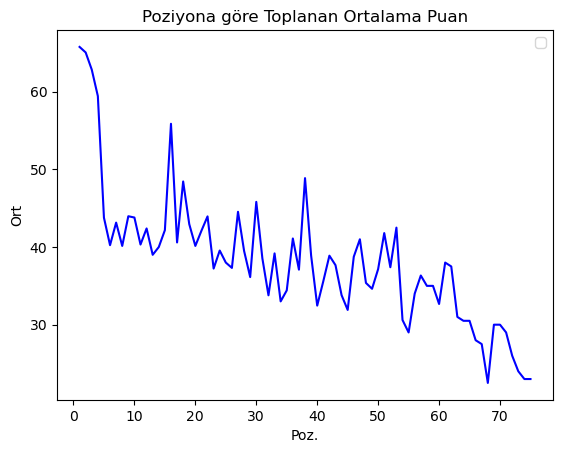

In [45]:
plt.title('Poziyona göre Toplanan Ortalama Puan')
plt.plot(df['Poz.'], df['Ort'], 'blue')

plt.xlabel('Poz.')
plt.ylabel('Ort')

plt.legend()
plt.show()

### Tabloda görüldüğü üzere bazı noktalarda sıralama bakımından sıçramalar var. Bunun sebebini öğrenemk için ilgili sütuna göre sıralama yaparsak:


In [46]:
df.sort_values('MBP',ascending=False).head(77)

,Poz.,Takım,Sezon,SonSezon,Puan,MBP,O,G,B,M,A,Y,GF,1.,2.,3.,4.,Lig,Ort
0,1,Fenerbahçe,66,2023-24,4341,"1,981",2191,1258,567,366,3932,1936,1996,19.0,24.0,8.0,5.0,Süper Lig,65.772727
1,2,Galatasaray,66,2023-24,4294,"1,960",2191,1250,544,397,3883,1927,1956,23.0,11.0,16.0,3.0,Süper Lig,65.060606
2,3,Beşiktaş,66,2023-24,4148,"1,895",2189,1185,593,411,3602,1903,1699,16.0,14.0,14.0,10.0,Süper Lig,62.848485
3,4,Trabzonspor,50,2023-24,2972,"1,768",1681,839,455,387,2631,1667,964,7.0,9.0,8.0,9.0,Süper Lig,59.440000
15,16,İstanbul Başakşehir,16,2023-24,894,"1,594",561,251,141,169,808,645,163,1.0,2.0,1.0,3.0,Süper Lig,55.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,Ümraniyespor,1,2022-23,30,"0,833",36,7,9,20,47,64,-17,0.0,0.0,0.0,0.0,1. Lig,30.000000
73,74,MKE Kırıkkalespor,1,1978-79,23,"0,767",30,5,8,17,21,64,-43,0.0,0.0,0.0,0.0,Amatör Lig,23.000000
71,72,Bucaspor,1,2010-11,26,"0,765",34,6,8,20,37,65,-28,0.0,0.0,0.0,0.0,Kapandı (2020),26.000000
72,73,Siirtspor,1,2000-01,24,"0,706",34,6,6,22,47,81,-34,0.0,0.0,0.0,0.0,Kapandı (2014),24.000000


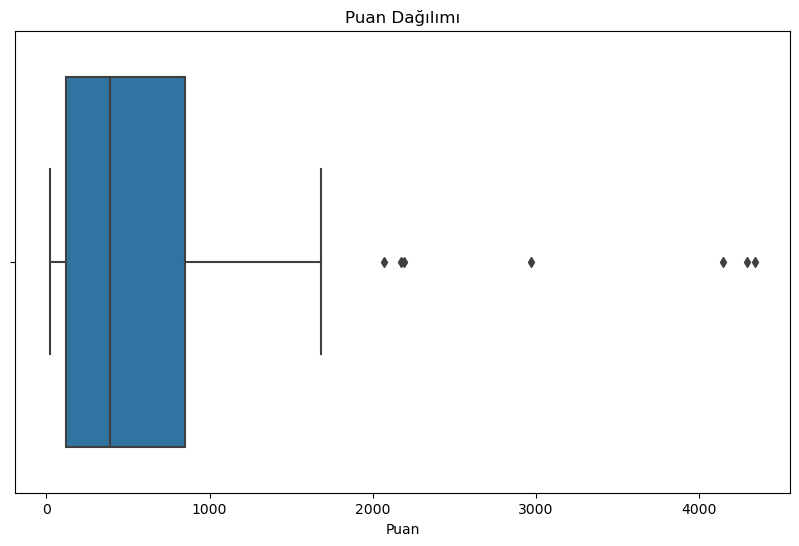

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Puan')
plt.title('Puan Dağılımı')
plt.xlabel('Puan')
plt.show()


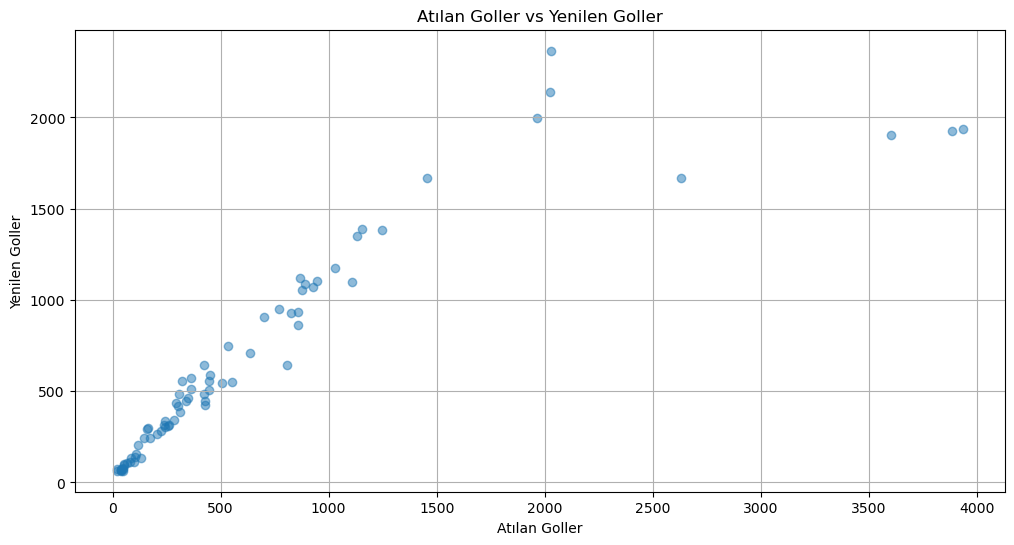

In [48]:
plt.figure(figsize=(12, 6))
plt.scatter(df['A'], df['Y'], alpha=0.5)
plt.title('Atılan Goller vs Yenilen Goller')
plt.xlabel('Atılan Goller')
plt.ylabel('Yenilen Goller')
plt.grid(True)
plt.show()


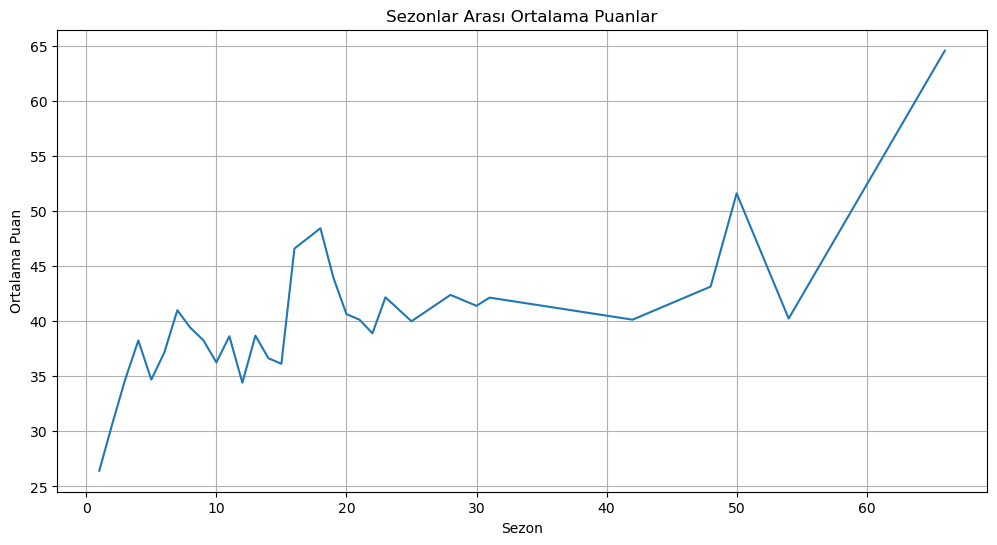

In [49]:
season_points = df.groupby('Sezon')['Ort'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=season_points, x='Sezon', y='Ort')
plt.title('Sezonlar Arası Ortalama Puanlar')
plt.xlabel('Sezon')
plt.ylabel('Ortalama Puan')
plt.grid(True)
plt.show()


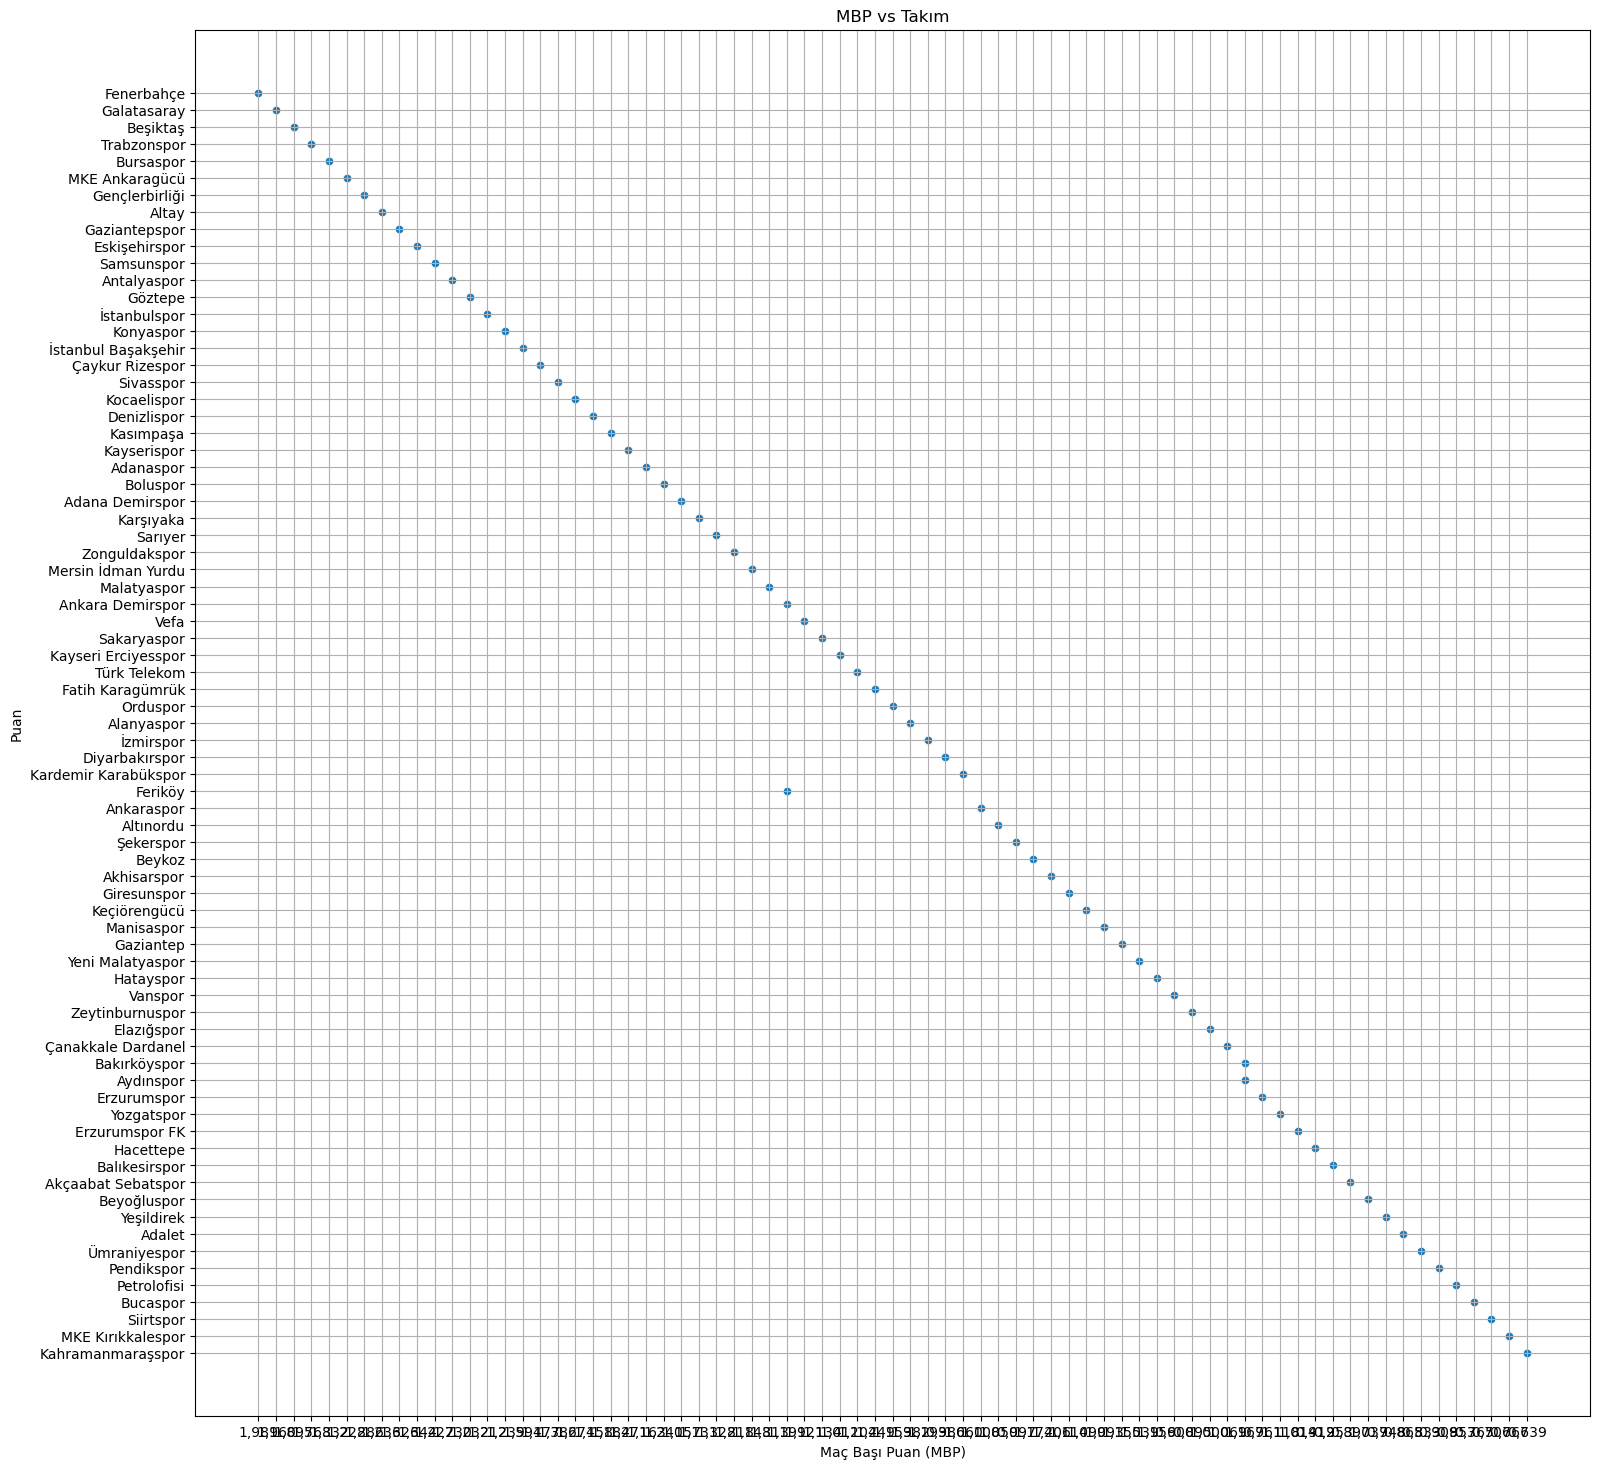

In [50]:
plt.figure(figsize=(18, 18))
sns.scatterplot(data=df, x='MBP', y='Takım')
plt.title('MBP vs Takım')
plt.xlabel('Maç Başı Puan (MBP)')
plt.ylabel('Puan')
plt.grid(True)
plt.show()


(array([ 5., 10., 12., 20., 19.,  3.,  1.,  1.,  1.,  3.]),
 array([22.5       , 26.82727273, 31.15454545, 35.48181818, 39.80909091,
        44.13636364, 48.46363636, 52.79090909, 57.11818182, 61.44545455,
        65.77272727]),
 <BarContainer object of 10 artists>)

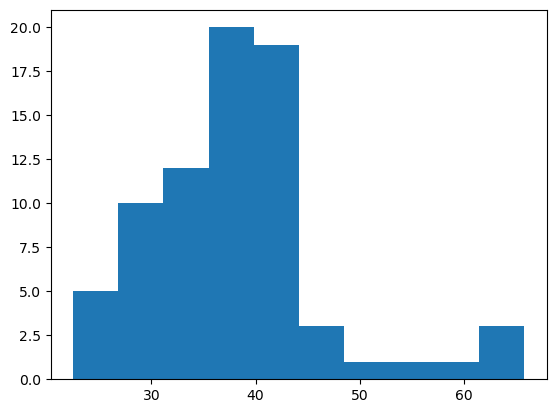

In [51]:
plt.hist(df.Ort)

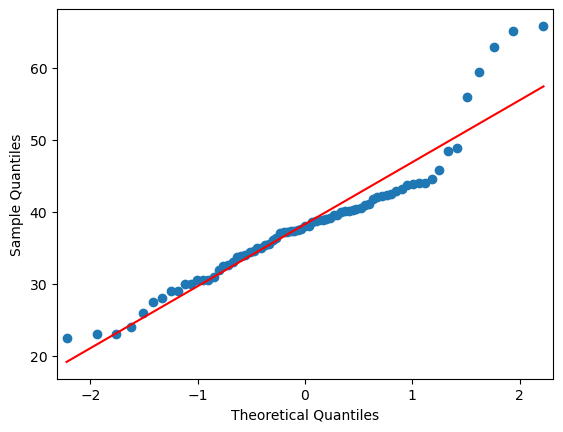

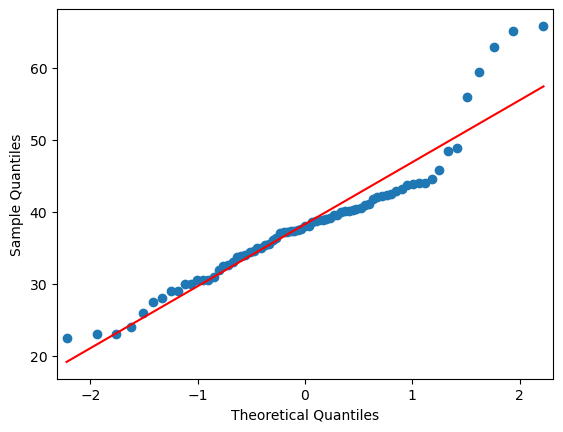

In [52]:
qqplot(df.Ort, line ='s')

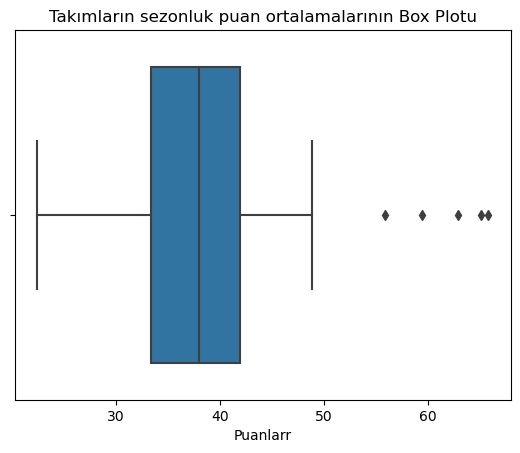

In [53]:


# Box plot oluşturma
sns.boxplot(x=Ort)
# Grafik başlığı ve eksen etiketlerini ekleme
plt.title('Takımların sezonluk puan ortalamalarının Box Plotu')
plt.xlabel('Puanlarr')

# Grafiği gösterme
plt.show()


In [54]:
shapiro(Ort)

ShapiroResult(statistic=0.9137863516807556, pvalue=8.287810487672687e-05)

#### 0.05 ' den küçük Normal Dağılıma Uygun Değil

### D’Agostino’nun K^2 Testi

In [55]:
normaltest(Ort)

NormaltestResult(statistic=19.12825737443979, pvalue=7.02023559313574e-05)

#### Normal dağılım göstermiyor

## 

In [56]:
# Kategorik sütunları seç
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
data_cat_df = df[categorical_cols]

# Sürekli (sayısal) sütunları seç
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns
data_cont_df = df[continuous_cols]


In [57]:
# Aykırı değerleri tespit etmek için IQR kullanalım
Q1 = data_cont_df.quantile(0.25)
Q3 = data_cont_df.quantile(0.75)
IQR = Q3 - Q1


# Aykırı değer filtresi (True = Aykırı değer)
outliers = (data_cont_df < (Q1 - 1.5 * IQR)) | (data_cont_df > (Q3 + 1.5 * IQR))
outlier_indices = set(outliers[outliers.any(axis=1)].index)
outlier_counts = outliers.sum()
outlier_counts

Poz.      0
Sezon     7
Puan      7
O         7
G         7
B         7
M         1
A         7
Y         2
GF        6
1.        6
2.        8
3.       17
4.       10
Ort       5
dtype: int64

#### Ligdeki 7 takım geri kalan 68 takımdan sayısal olarak ayrışmaktadır.
#### Sadece 6 takım şampiyonluğa ulaştığı için "1." sütunu için aykırı değer oluşur.

In [58]:
# Kategorik sütunları seç
categorical_cols = df1.select_dtypes(include=['object', 'category']).columns
data_cat_df1 = df1[categorical_cols]

# Sürekli (sayısal) sütunları seç
continuous_cols = df1.select_dtypes(include=['int64', 'float64']).columns
data_cont_df1 = df1[continuous_cols]


In [59]:
# Aykırı değerleri tespit etmek için IQR kullanalım
Q1 = data_cont_df1.quantile(0.25)
Q3 = data_cont_df1.quantile(0.75)
IQR = Q3 - Q1


# Aykırı değer filtresi (True = Aykırı değer)
outliers = (data_cont_df1 < (Q1 - 1.5 * IQR)) | (data_cont_df1 > (Q3 + 1.5 * IQR))
outlier_indices = set(outliers[outliers.any(axis=1)].index)
outlier_counts = outliers.sum()
outlier_counts

Season                 0
Week                   0
hgoal               1362
vgoal                 52
totgoal              399
goaldiff            3587
hgoal_half           569
vgoal_half           240
half_totgoal          27
half_goaldiff       1096
home_red_card       1393
visitor_red_card    1835
dtype: int64

#### Deplasman takımları genellikle ortalamaya yakın goller atmışlardır.
#### İlk yarılarda genellikle ortalamaya yakın goller atılmıştır. Görüldüğü üzere aykırı değer oldukça az.

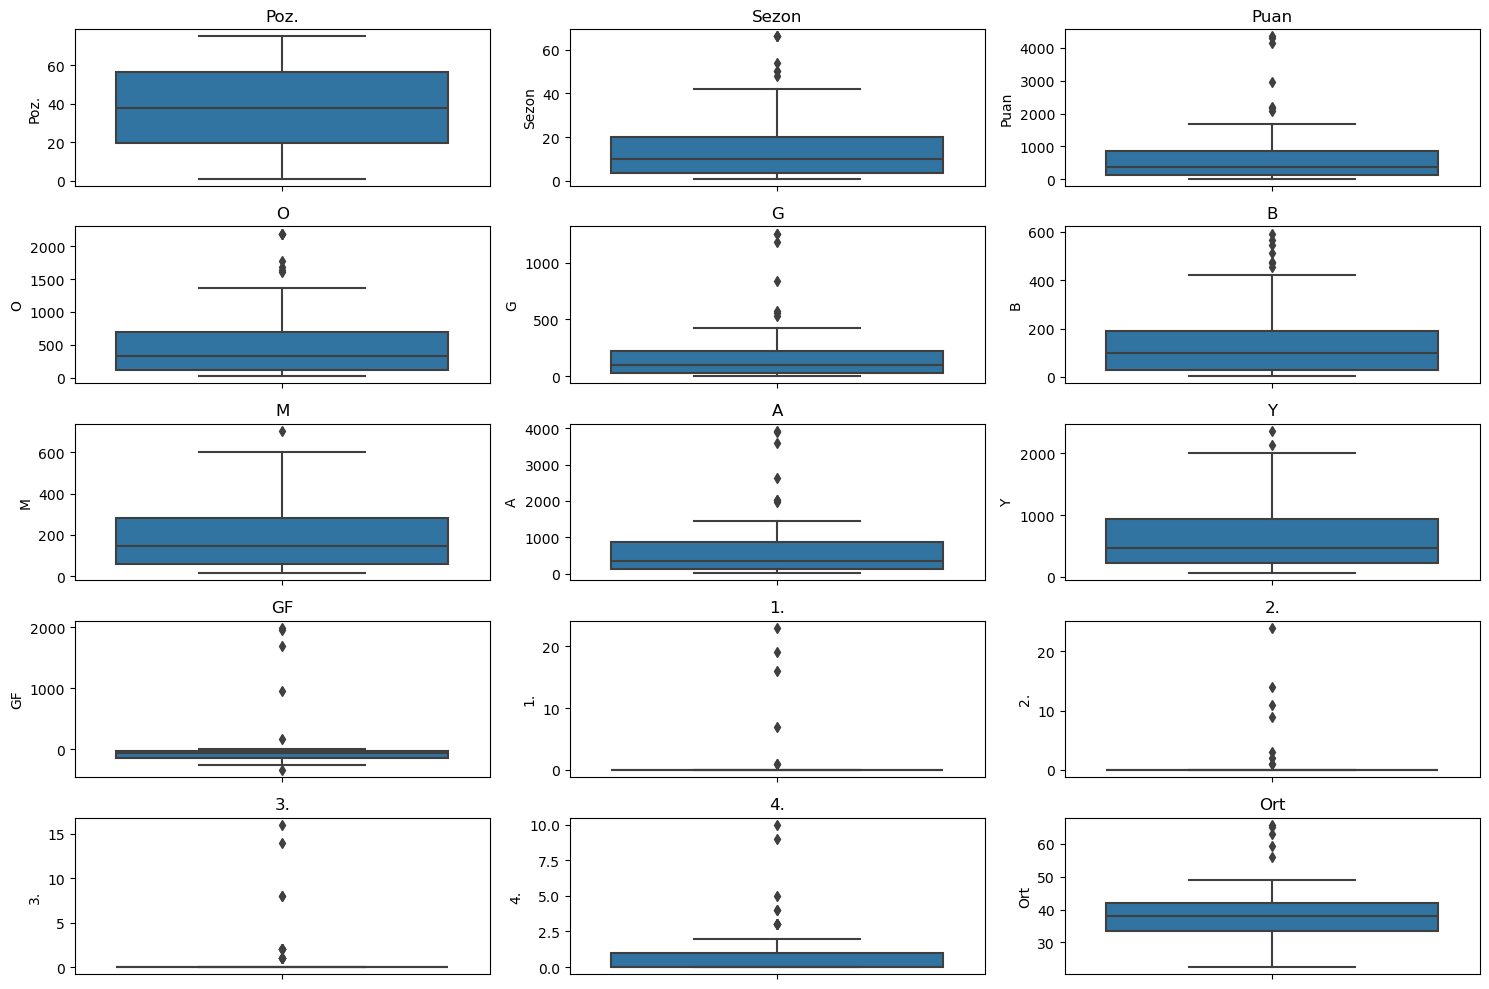

In [60]:
#aykırı değerleri her bir sürekli sütunlar için görselleştiriyoruz.

plt.figure(figsize=(15, 10))  # Grafiğin boyutunu
for i, column in enumerate(data_cont_df.columns):
    plt.subplot((len(data_cont_df.columns) + 2) // 3, 3, i + 1)  # 3 sütunlu bir düzen oluştur
    sns.boxplot(y=data_cont_df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

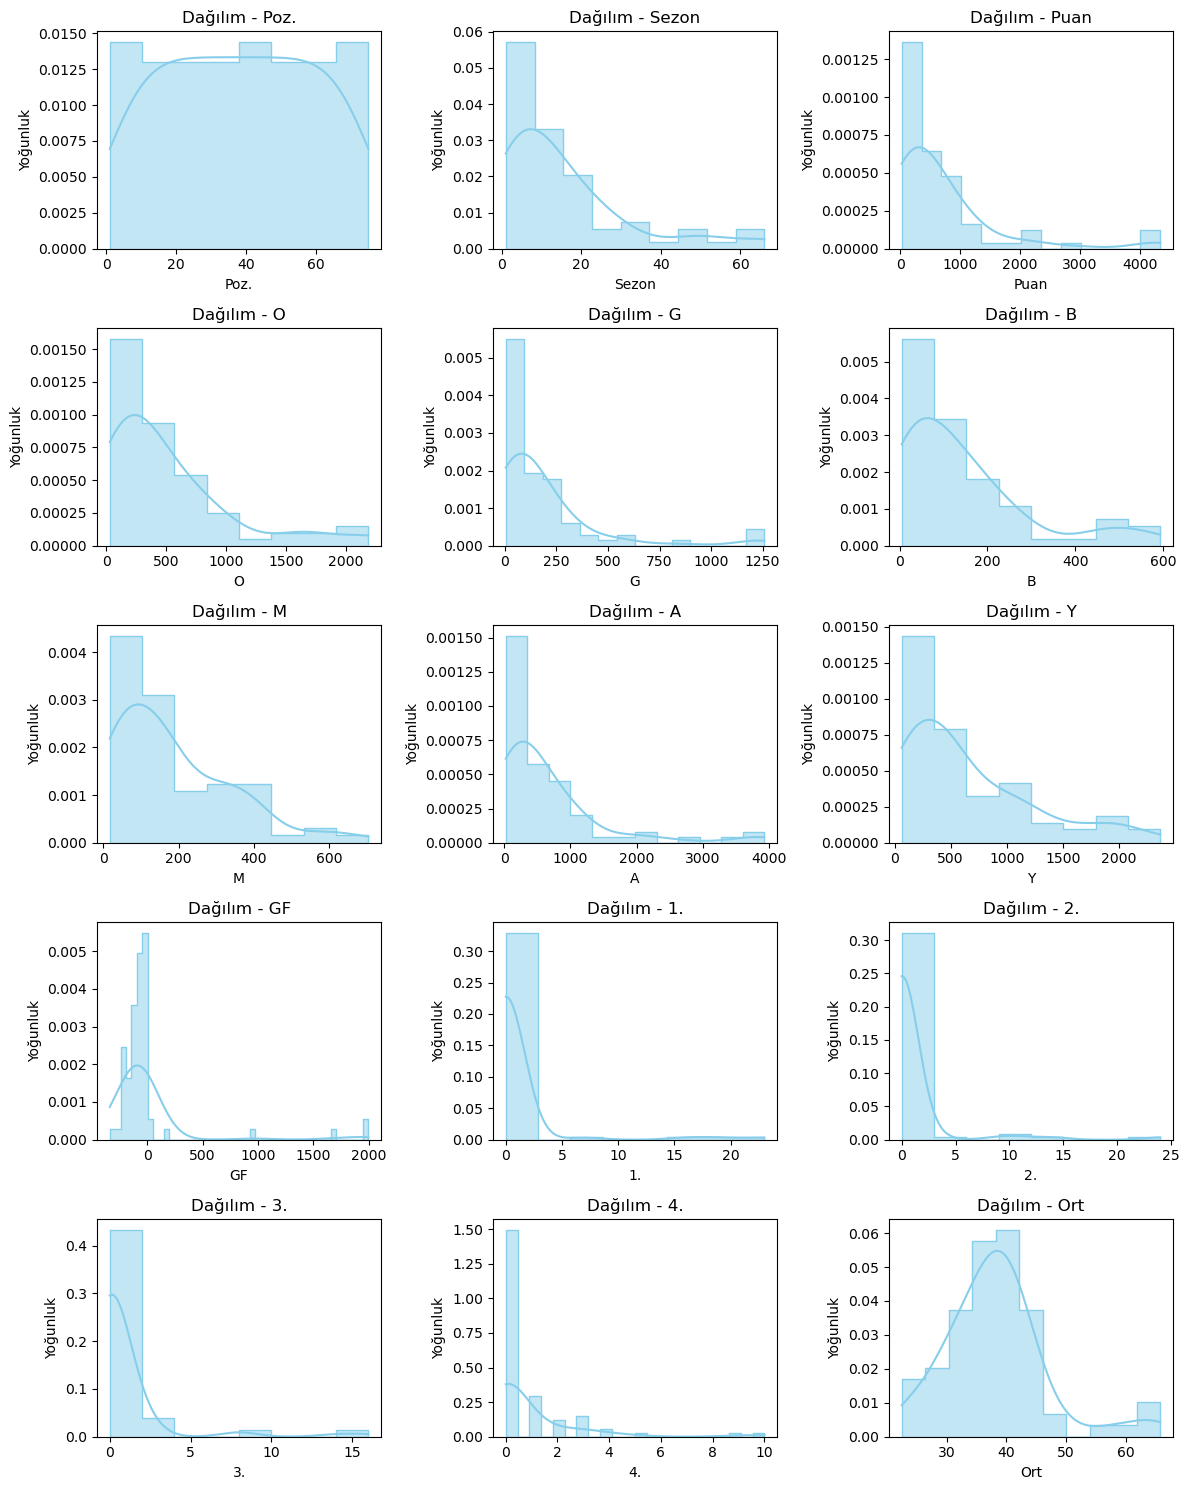

In [61]:
#Tüm sürekli sürunlar için görselleştirme yapalım
# Grafiği oluşturacak toplam sütun ve satır sayısını belirleyelim

n_cols = 3
n_rows = (len(data_cont_df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))  # Her subplot için boyutlar belirleme

for i, column in enumerate(data_cont_df.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # n_rows ve n_cols ile subplot düzeni oluşturur
    sns.histplot(data_cont_df[column], kde=True, color='skyblue', element='step', stat='density')  # Histogram ve yoğunluk eğrisi
    plt.title(f'Dağılım - {column}')
    plt.xlabel(column)
    plt.ylabel('Yoğunluk')

plt.tight_layout()  # Grafikler arası boşlukları otomatik ayarlar
plt.show()

In [62]:
#Z-Skoru normalizasyonu

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Verileri normalize eder
data_cont_normalized = scaler.fit_transform(data_cont_df)

# Normalize edilmiş verileri DataFrame'e dönüştürür
data_cont_normalized = pd.DataFrame(data_cont_normalized, columns=data_cont_df.columns)

In [63]:
data_cont_normalized.head(10)

,Poz.,Sezon,Puan,O,G,B,M,A,Y,GF,1.,2.,3.,4.,Ort
0,-1.709109,3.112176,3.925133,3.116055,4.080161,2.856150,1.155141,3.951326,2.228962,4.849432,4.650085,6.560027,2.623053,2.251941,3.197143
1,-1.662917,3.112176,3.874431,3.116055,4.049713,2.700645,1.354067,3.892372,2.213389,4.752249,5.677350,2.873556,5.564795,1.162292,3.114324
2,-1.616724,3.112176,3.716928,3.112333,3.802318,3.031938,1.443905,3.554290,2.171861,4.127848,3.879637,3.724280,4.829360,4.976064,2.857059
3,-1.570532,2.124706,2.448278,2.166984,2.485417,2.098909,1.289897,2.386045,1.763508,2.342110,1.568291,2.306407,2.623053,4.431240,2.460659
4,-1.524340,2.124706,1.603591,2.098130,1.469195,2.220609,2.650296,1.584756,2.336241,-0.080176,0.027394,-0.245765,0.049029,0.617468,0.639431
5,-1.478148,2.371574,1.586330,2.330745,1.400686,2.477530,3.324078,1.661756,2.972995,-0.818767,-0.229422,-0.245765,-0.318689,1.707117,0.227823
6,-1.431956,2.001273,1.476294,2.034858,1.316952,2.234131,2.675963,1.658147,2.583675,-0.279401,-0.229422,-0.245765,0.416747,-0.472181,0.565679
7,-1.385764,1.630971,1.060962,1.577071,0.898284,1.862271,2.156189,0.969953,1.763508,-0.517499,-0.229422,-0.245765,0.416747,0.617468,0.216439
8,-1.339572,0.952086,0.712515,0.951801,0.685144,0.814304,1.354067,0.722107,1.272100,-0.327993,-0.229422,-0.245765,0.416747,1.707117,0.661265
9,-1.293380,0.890369,0.659655,0.858754,0.563350,1.132075,0.936964,0.556074,0.784153,0.021866,-0.229422,0.604959,0.416747,0.617468,0.641757


#### Z Skoru Normalizasyonu bize değerlerin ortalamaya göre konumunun ve dağılımının nasıl olduğunu gösterir. Yukaridaki tabloda ilk 3 takım diğer takımlara göre her anlamda fark yaratmıştır.

In [64]:
# Korelasyon matrisini hesaplama
correlation_matrix = data_cont_df.corr()
correlation_matrix

,Poz.,Sezon,Puan,O,G,B,M,A,Y,GF,1.,2.,3.,4.,Ort
Poz.,1.000000,-0.860952,-0.768988,-0.863246,-0.740517,-0.873144,-0.899505,-0.774149,-0.902419,-0.296180,-0.377082,-0.391745,-0.472881,-0.584536,-0.778893
Sezon,-0.860952,1.000000,0.968758,0.999506,0.952664,0.994594,0.896422,0.969423,0.964696,0.603064,0.676386,0.661255,0.744598,0.745456,0.763297
Puan,-0.768988,0.968758,1.000000,0.970174,0.998205,0.947704,0.762996,0.998326,0.880359,0.779850,0.829031,0.807598,0.864770,0.788877,0.814518
O,-0.863246,0.999506,0.970174,1.000000,0.954600,0.993153,0.896228,0.972010,0.966599,0.605618,0.678068,0.663328,0.745611,0.743839,0.773168
G,-0.740517,0.952664,0.998205,0.954600,1.000000,0.926890,0.726022,0.996293,0.853620,0.813291,0.858170,0.833683,0.884968,0.789667,0.818336
B,-0.873144,0.994594,0.947704,0.993153,0.926890,1.000000,0.912836,0.947400,0.968398,0.553395,0.622459,0.618629,0.703639,0.735866,0.743784
M,-0.899505,0.896422,0.762996,0.896228,0.726022,0.912836,1.000000,0.772842,0.974798,0.191910,0.300524,0.294617,0.411202,0.535181,0.580465
A,-0.774149,0.969423,0.998326,0.972010,0.996293,0.947400,0.772842,1.000000,0.890409,0.769120,0.821634,0.799060,0.852463,0.771470,0.818226
Y,-0.902419,0.964696,0.880359,0.966599,0.853620,0.968398,0.974798,0.890409,1.000000,0.393935,0.488581,0.481533,0.574710,0.637679,0.695213
GF,-0.296180,0.603064,0.779850,0.605618,0.813291,0.553395,0.191910,0.769120,0.393935,1.000000,0.973152,0.937462,0.914470,0.662499,0.676131


C:\Users\senol\AppData\Local\Temp\ipykernel_9380\558340792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cont_df['Puan']=data_cont_df['Puan']-data_cont_df['G']


<Axes: xlabel='Puan', ylabel='G'>

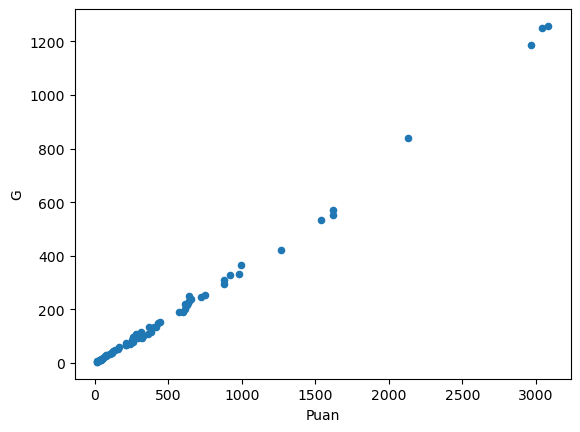

In [65]:
data_cont_df['Puan']=data_cont_df['Puan']-data_cont_df['G']
data_cont_df.plot.scatter('Puan','G')

In [71]:
correlation_matrix1 = data_cont_df1.corr()
correlation_matrix1

,Season,Week,hgoal,vgoal,totgoal,goaldiff,hgoal_half,vgoal_half,half_totgoal,half_goaldiff,home_red_card,visitor_red_card
Season,1.000000,0.020975,0.078615,0.152739,0.155868,-0.038447,0.041565,0.080214,0.081938,-0.019351,0.125156,0.118899
Week,0.020975,1.000000,0.017369,0.026635,0.029942,-0.003853,0.015284,0.020724,0.024622,-0.001443,-0.001532,-0.011422
hgoal,0.078615,0.017369,1.000000,0.032593,0.775139,0.757874,0.688083,0.027350,0.539885,0.520711,-0.047927,0.108298
vgoal,0.152739,0.026635,0.032593,1.000000,0.656719,-0.627353,0.043097,0.691210,0.466718,-0.413279,0.120382,-0.034522
totgoal,0.155868,0.029942,0.775139,0.656719,1.000000,0.175277,0.546426,0.457569,0.702388,0.131650,0.039934,0.059893
goaldiff,-0.038447,-0.003853,0.757874,-0.627353,0.175277,1.000000,0.507988,-0.429876,0.116002,0.675478,-0.115921,0.106914
hgoal_half,0.041565,0.015284,0.688083,0.043097,0.546426,0.507988,1.000000,0.030094,0.778561,0.762999,-0.031011,0.052420
vgoal_half,0.080214,0.020724,0.027350,0.691210,0.457569,-0.429876,0.030094,1.000000,0.650715,-0.623145,0.066826,-0.016175
half_totgoal,0.081938,0.024622,0.539885,0.466718,0.702388,0.116002,0.778561,0.650715,1.000000,0.188381,0.018399,0.029666
half_goaldiff,-0.019351,-0.001443,0.520711,-0.413279,0.131650,0.675478,0.762999,-0.623145,0.188381,1.000000,-0.067481,0.051477


C:\Users\senol\AppData\Local\Temp\ipykernel_9380\58020429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cont_df1['home_red_card']=data_cont_df1['home_red_card']-data_cont_df1['goaldiff']


<Axes: xlabel='home_red_card', ylabel='goaldiff'>

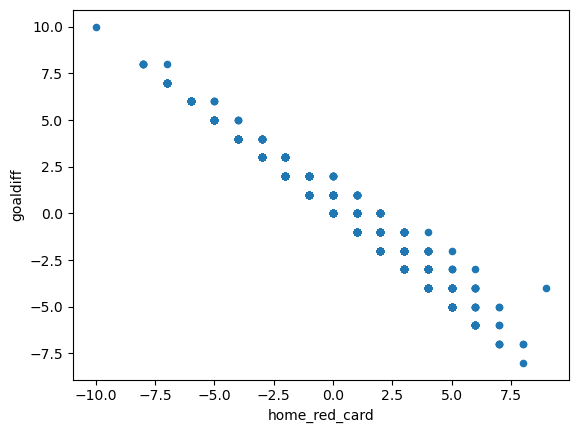

In [75]:
data_cont_df1['home_red_card']=data_cont_df1['home_red_card']-data_cont_df1['goaldiff']
data_cont_df1.plot.scatter('home_red_card','goaldiff')

### Görüldüğü üzere, herhangi bir değişken ikilisinde yüksek korelasyon gözükmüyor.

## Hipotezler
### Null Hipotezi (H0): Üst sıralardaki takımların puan ortalaması ile alt sıralardaki takımların puan ortalaması arasında anlamlı bir fark yoktur.
### Alternatif Hipotez (H1): Üst sıralardaki takımların puan ortalaması ile alt sıralardaki takımların puan ortalaması arasında anlamlı bir fark vardır.

## İstatistiksel Test
### Bu hipotezi test etmek için iki bağımsız grup arasındaki ortalama farkı test eden bir t-testi


In [83]:

# Üst sıralardaki takımların puanları (ilk 4 takım)
ust_sira_puanlari = np.array([65, 65, 62, 59])

# Alt sıralardaki takımların puanları (son 4 takım)
alt_sira_puanlari = np.array([26, 24, 23, 23])

# Hipotez testi
t_stat, p_value = ss.ttest_ind(ust_sira_puanlari, alt_sira_puanlari)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Sonuçları yorumlama
alpha = 0.05  # İstatistiksel anlamlılık seviyesi

if p_value < alpha:
    print("Null hipotezi reddedilir. Üst sıralardaki takımların puan ortalaması ile alt sıralardaki takımların puan ortalaması arasında anlamlı bir fark vardır.")
else:
    print("Null hipotezi reddedilemez. Üst sıralardaki takımların puan ortalaması ile alt sıralardaki takımların puan ortalaması arasında anlamlı bir fark yoktur.")


T-statistic: 24.20693309273394
P-value: 3.266254001461766e-07
Null hipotezi reddedilir. Üst sıralardaki takımların puan ortalaması ile alt sıralardaki takımların puan ortalaması arasında anlamlı bir fark vardır.


### Null Hipotezi (H0): Ev sahibi takımların gol ortalaması ile deplasman takımlarının gol ortalaması arasında anlamlı bir fark yoktur.
### Alternatif Hipotez (H1): Ev sahibi takımların gol ortalaması ile deplasman takımlarının gol ortalaması arasında anlamlı bir fark vardır.

In [84]:

# Ev sahibi ve deplasman takımlarının attığı goller
home_goals = df1['hgoal']
away_goals = df1['vgoal']

# Hipotez testi
t_stat, p_value = ss.ttest_ind(home_goals, away_goals)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Sonuçları yorumlama
alpha = 0.05  # İstatistiksel anlamlılık seviyesi

if p_value < alpha:
    print("Null hipotezi reddedilir. Ev sahibi takımların gol ortalaması ile deplasman takımlarının gol ortalaması arasında anlamlı bir fark vardır.")
else:
    print("Null hipotezi reddedilemez. Ev sahibi takımların gol ortalaması ile deplasman takımlarının gol ortalaması arasında anlamlı bir fark yoktur.")


T-statistic: 40.09420926472686
P-value: 0.0
Null hipotezi reddedilir. Ev sahibi takımların gol ortalaması ile deplasman takımlarının gol ortalaması arasında anlamlı bir fark vardır.


#### Bu sonuç ev sahibi takımın avantajlı olduğunu gösterir.

In [79]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Örnek veri oluşturma
# Sezon 1: 2021-2022 sezonu
season1_wins = 180  # Ev sahibi takımların galibiyet sayısı
season1_total = 380  # Toplam maç sayısı

# Sezon 2: 2022-2023 sezonu
season2_wins = 200  # Ev sahibi takımların galibiyet sayısı
season2_total = 380  # Toplam maç sayısı

# Galibiyet oranları
season1_proportion = season1_wins / season1_total
season2_proportion = season2_wins / season2_total

# Hipotez testi için veri
count = np.array([season1_wins, season2_wins])
nobs = np.array([season1_total, season2_total])

# Z-testi
stat, p_value = proportions_ztest(count, nobs)

print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Sonuçları yorumlama
alpha = 0.05  # İstatistiksel anlamlılık seviyesi

if p_value < alpha:
    print("Null hipotezi reddedilir. İki sezon arasında ev sahibi takımların galibiyet oranları arasında anlamlı bir fark vardır.")
else:
    print("Null hipotezi reddedilemez. İki sezon arasında ev sahibi takımların galibiyet oranları arasında anlamlı bir fark yoktur.")

Z-statistic: -1.4509525002200234
P-value: 0.146793087308571
Null hipotezi reddedilemez. İki sezon arasında ev sahibi takımların galibiyet oranları arasında anlamlı bir fark yoktur.


#### Bu hipotez testi ile birlikte Süper Lig'de oynanan maçlarda Ev Sahibi takım çoğunlukla avantıjlıdır.